## AirBnB Listing Analysis:
As AirBnB has grown in popularity, it has increasingly become the focus of regulations designed to limit the number of properties listed in each city.
In this project, we're analyzing Paris listings with a focus on pricing and the number of hosts. We want to know whether the regulations adopted in 2015 impacted the listings in this city.

In [1]:
import pandas as pd

c:\Users\hp\anaconda3\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
listings = pd.read_csv('Listings.csv', encoding='latin1')

C:\Users\hp\AppData\Local\Temp\ipykernel_8076\1148699358.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('Listings.csv', encoding='latin1')


In [5]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [9]:
listings['host_since']=pd.to_datetime(listings['host_since'])

In [59]:
listingsInParis = listings[listings['city'] == 'Paris']

In [60]:
listingsInParis = listingsInParis[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [61]:
listingsInParis.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [62]:
listingsInParis.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [63]:
paris_listings_neighbourhood = listingsInParis.groupby('neighbourhood').agg(avg_price=('price', 'mean')).sort_values(by='avg_price', ascending=True)

In [64]:
print(paris_listings_neighbourhood)

                      avg_price
neighbourhood                  
Menilmontant          74.942257
Buttes-Chaumont       82.690182
Buttes-Montmartre     87.209479
Reuilly               89.058402
Popincourt            90.559459
Gobelins              98.110184
Observatoire         101.866801
Batignolles-Monceau  102.612702
Enclos-St-Laurent    102.967156
Vaugirard            106.831330
Opera                119.038644
Pantheon             122.662150
Temple               138.446823
Hotel-de-Ville       144.472110
Bourse               149.496801
Luxembourg           155.638639
Palais-Bourbon       156.856578
Passy                161.144635
Louvre               175.379972
Elysee               210.536765


In [65]:
paris_listings_accomodations = listingsInParis[listingsInParis['neighbourhood'] == 'Elysee'] \
    .groupby('accommodates') \
    .agg(avg_price=('price', 'mean')) \
    .sort_values(by='avg_price', ascending=True)


In [66]:
print(paris_listings_accomodations)

               avg_price
accommodates            
0               0.000000
1              79.522222
3             152.828767
2             155.103352
4             212.096070
5             328.817073
6             355.508571
8             405.518519
7             411.538462
9             440.272727
10            500.857143
12            529.625000
16            800.000000
11            805.000000
13            842.500000
14            971.000000


In [67]:
paris_listings_over_time = (
    listingsInParis.set_index(listingsInParis['host_since'].dt.year)
    .groupby(listingsInParis['host_since'].dt.year)
    .agg({'price': 'mean', 'neighbourhood': 'count'}).sort_index()
)

In [68]:
print(paris_listings_over_time)

                 price  neighbourhood
host_since                           
2011.0      141.456038           3412
2012.0      112.869266          19184
2015.0      107.581125          32943
2016.0      138.209362           4294
2017.0      108.658888           4585
2018.0      122.828452            239


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Neighbourhood')

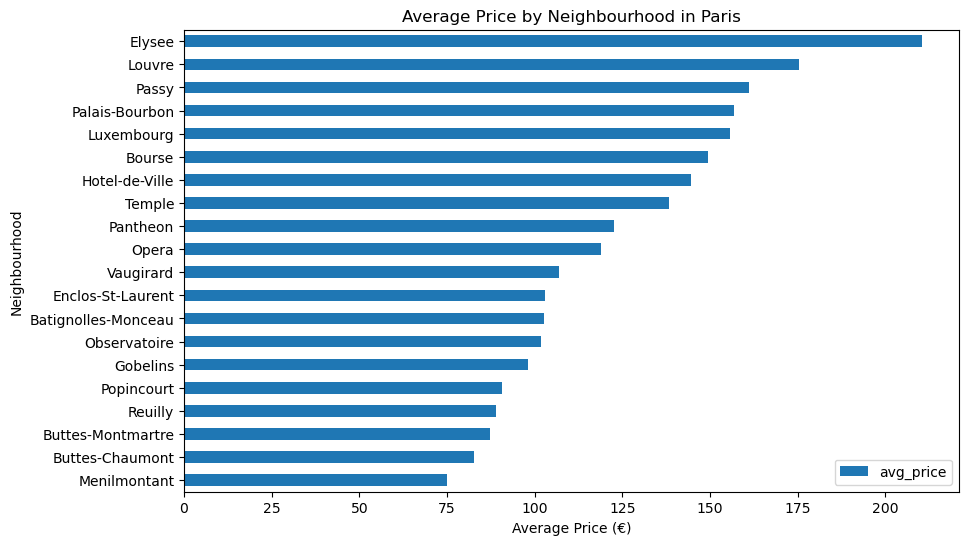

In [72]:
ax = paris_listings_neighbourhood.plot.barh(figsize=(10, 6))
ax.set_title('Average Price by Neighbourhood in Paris')
ax.set_xlabel('Average Price (€)')
ax.set_ylabel('Neighbourhood')

Text(0, 0.5, 'Accomodations')

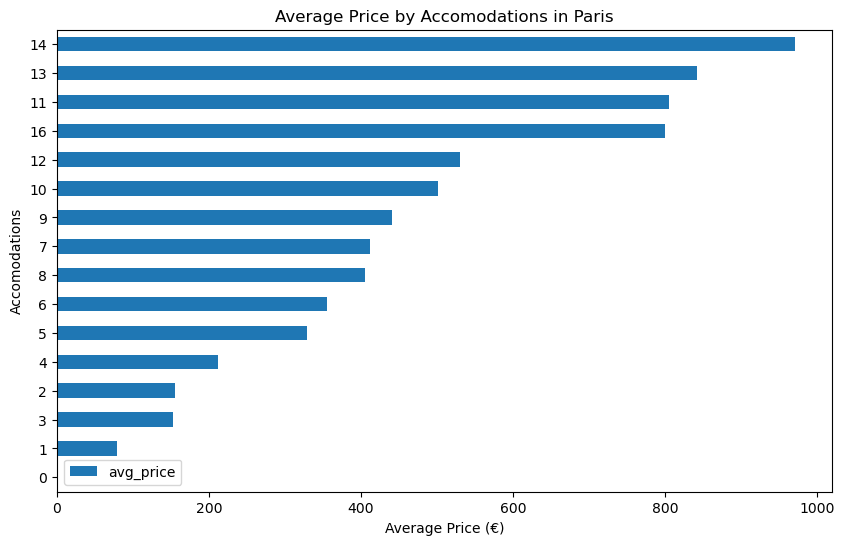

In [73]:
ax = paris_listings_accomodations.plot.barh(figsize=(10, 6))
ax.set_title('Average Price by Accomodations in Paris')
ax.set_xlabel('Average Price (€)')
ax.set_ylabel('Accomodations')

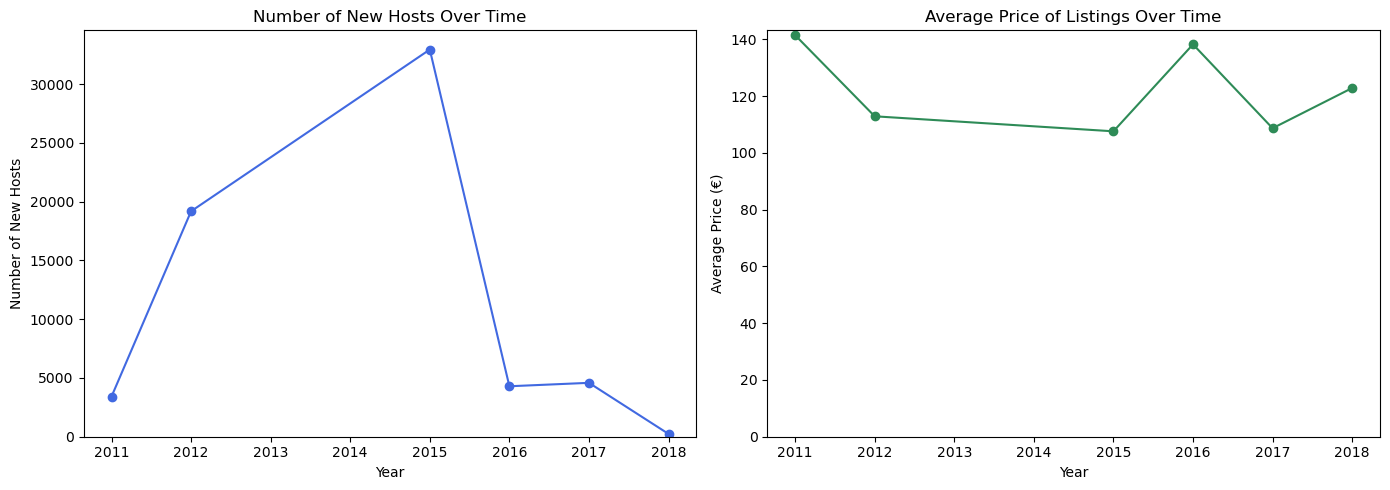

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# --- Chart 1: New Hosts Over Time ---
axes[0].plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'], marker='o', color='royalblue')
axes[0].set_title('Number of New Hosts Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of New Hosts')
axes[0].set_ylim(bottom=0)

# --- Chart 2: Average Price Over Time ---
axes[1].plot(paris_listings_over_time.index, paris_listings_over_time['price'], marker='o', color='seagreen')
axes[1].set_title('Average Price of Listings Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Price (€)')
axes[1].set_ylim(bottom=0)


plt.tight_layout()
plt.show()


We can see that the regulations adopted in 2015 clearly impacted the listings in the Paris market. The number of new hosts dropped drastically and the prices went up.